# Accuracy Assessment Metrics 

- `Mean Absolute Error (MAE)`: It measures the average absolute difference between the predicted values and the actual values. (MAE close to 0, indicates good accuracy)


- `Mean Squared Error (MSE)`: It measures the average squared difference between the predicted values and the actual values (The lower the MSE, the better the forecast.).


- `Root Mean Squared Error (RMSE)`: It measures the square root of the average squared difference between the predicted values and the actual values. (lower the RMSE, the better the forecast)


- `Coefficient of Determination (R-squared or R2)`: It measures the proportion of the variation in the dependent variable that is explained by the independent variables


In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r'/home/yoni/Documents/Python_Training/08_day/RMSE.csv')

In [3]:
df

,STATION,LON,LAT,WRF_Aug,Stn_Aug
0,A.A.Obs,38.75,9.02,12.571,19.2
1,A.Ketema,39.03,10.03,38.252,1.7
2,A.Robe,39.62,7.85,0.096,2.6
3,Aboabo,34.43,7.85,2.230,40.0
4,Abomsa,39.82,8.47,0.004,1.4
...,...,...,...,...,...
87,W.Tena,39.22,11.59,15.708,46.7
88,Werabe,38.19,7.85,3.180,34.1
89,Woliso,37.97,8.54,5.363,17.6
90,Yabello,38.10,6.88,0.176,2.6


In [4]:
# Define the true and predicted values as numpy arrays

y_pred = df['WRF_Aug']
y_true = df['Stn_Aug']

In [5]:
y_pred

0     12.571
1     38.252
2      0.096
3      2.230
4      0.004
       ...  
87    15.708
88     3.180
89     5.363
90     0.176
91     0.747
Name: WRF_Aug, Length: 92, dtype: float64

In [6]:
y_true

0     19.2
1      1.7
2      2.6
3     40.0
4      1.4
      ... 
87    46.7
88    34.1
89    17.6
90     2.6
91     0.0
Name: Stn_Aug, Length: 92, dtype: float64

In [7]:
# Calculate the Mean Absolute Error (MAE)
mae = np.mean(np.abs(y_true - y_pred))
print(f"MAE: {mae:.2f}")

MAE: 14.30


In [8]:
# Calculate the Mean Squared Error (MSE)
mse = np.mean((y_true - y_pred)**2)
print(f"MSE: {mse:.2f}")

MSE: 413.84


In [9]:
# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.2f}")

RMSE: 20.34


In [10]:
# calculate RMSE
rmse = np.sqrt(((y_pred -y_true) ** 2).mean())

In [11]:
print('RMSE:', rmse)

RMSE: 20.34306767387163


In [12]:
# Calculate the Coefficient of Determination (R-squared or R2)
ss_res = np.sum((y_true - y_pred)**2)
ss_tot = np.sum((y_true - np.mean(y_true))**2)
r2 = 1 - ss_res/ss_tot
print(f"R-squared: {r2:.2f}")

R-squared: -0.68


# Reading data from netCDF file at station locations

In [13]:
import xarray as xr

In [14]:
# open the xarray dataset
ds = xr.open_dataset('era5_ecmwf_mon.nc')

In [15]:
ds

<xarray.Dataset>
Dimensions:    (longitude: 61, latitude: 49, time: 60)
Coordinates:
  * longitude  (longitude) float32 33.0 33.25 33.5 33.75 ... 47.5 47.75 48.0
  * latitude   (latitude) float32 15.0 14.75 14.5 14.25 ... 3.75 3.5 3.25 3.0
  * time       (time) datetime64[ns] 2018-01-01T23:00:00 ... 2022-12-01T23:00:00
Data variables:
    t2m        (time, latitude, longitude) float32 ...
    sst        (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-03-14 04:44:29 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [16]:
# select the variable of interest (assuming it's called 'data')
data_t2m = ds['t2m']
data_t2m

<xarray.DataArray 't2m' (time: 60, latitude: 49, longitude: 61)>
[179340 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 33.0 33.25 33.5 33.75 ... 47.5 47.75 48.0
  * latitude   (latitude) float32 15.0 14.75 14.5 14.25 ... 3.75 3.5 3.25 3.0
  * time       (time) datetime64[ns] 2018-01-01T23:00:00 ... 2022-12-01T23:00:00
Attributes:
    units:      K
    long_name:  2 metre temperature

In [17]:
data_t2m_jan = data_t2m[0,:,:]
data_t2m_jan

<xarray.DataArray 't2m' (latitude: 49, longitude: 61)>
array([[293.76477, 293.8995 , 294.19046, ..., 283.66135, 283.8097 , 283.6416 ],
       [294.1356 , 294.29404, 294.4191 , ..., 285.0148 , 285.14557, 285.12405],
       [294.4248 , 294.6065 , 294.76053, ..., 286.7373 , 286.49506, 287.21567],
       ...,
       [293.48126, 293.42685, 291.01266, ..., 298.20602, 298.21173, 298.27448],
       [294.49326, 294.2686 , 292.88004, ..., 298.20602, 298.27844, 298.28415],
       [294.41296, 294.44632, 293.46765, ..., 298.27844, 298.23718, 298.23718]],
      dtype=float32)
Coordinates:
  * longitude  (longitude) float32 33.0 33.25 33.5 33.75 ... 47.5 47.75 48.0
  * latitude   (latitude) float32 15.0 14.75 14.5 14.25 ... 3.75 3.5 3.25 3.0
    time       datetime64[ns] 2018-01-01T23:00:00
Attributes:
    units:      K
    long_name:  2 metre temperature

In [18]:
# select the variable of interest (assuming it's called 'data')
data_var = data_t2m[0,:,:]

In [19]:
# create a list to store the data and station names
result = []

# loop through the stations and select the data for each one
for index, row in df.iterrows():
    # select the data for the current station
    data = data_var.sel(latitude=row['LAT'], longitude=row['LON'], method='nearest').values.item()
    # append the data and station name to the result list
    result.append((row['STATION'], row['LAT'], row['LON'], data))

# create a pandas dataframe from the result list
df_result = pd.DataFrame(result, columns=['STATION','LAT', 'LON', 'DATA'])

# print the dataframe
df_result


,STATION,LAT,LON,DATA
0,A.A.Obs,9.02,38.75,283.491058
1,A.Ketema,10.03,39.03,288.878052
2,A.Robe,7.85,39.62,281.370056
3,Aboabo,7.85,34.43,298.084900
4,Abomsa,8.47,39.82,287.518463
...,...,...,...,...
87,W.Tena,11.59,39.22,283.526184
88,Werabe,7.85,38.19,287.180542
89,Woliso,8.54,37.97,286.618378
90,Yabello,6.88,38.10,288.678802


In [20]:
# open the xarray dataset
ds_wrf = xr.open_dataset('wrfdaily_d02_2023-03-03_06_00_00')
ds_wrf

<xarray.Dataset>
Dimensions:       (Time: 4, south_north: 588, west_east: 669,
                   west_east_stag: 670, south_north_stag: 589)
Coordinates:
    XLAT          (Time, south_north, west_east) float32 ...
    XLONG         (Time, south_north, west_east) float32 ...
    XLAT_U        (Time, south_north, west_east_stag) float32 ...
    XLONG_U       (Time, south_north, west_east_stag) float32 ...
    XLAT_V        (Time, south_north_stag, west_east) float32 ...
    XLONG_V       (Time, south_north_stag, west_east) float32 ...
Dimensions without coordinates: Time, south_north, west_east, west_east_stag,
                                south_north_stag
Data variables: (12/37)
    Times         (Time) |S19 ...
    T2MIN         (Time, south_north, west_east) float32 ...
    T2MAX         (Time, south_north, west_east) float32 ...
    TT2MIN        (Time, south_north, west_east) float32 ...
    TT2MAX        (Time, south_north, west_east) float32 ...
    T2MEAN        (Time, south_north, west_east) float32 ...
    ...            ...
    TRAINCVMAX    (Time, south_north, west_east) float32 ...
    TRAINNCVMAX   (Time, south_north, west_east) float32 ...
    RAINCVMEAN    (Time, south_north, west_east) float32 ...
    RAINNCVMEAN   (Time, south_north, west_east) float32 ...
    RAINCVSTD     (Time, south_north, west_east) float32 ...
    RAINNCVSTD    (Time, south_north, west_east) float32 ...
Attributes: (12/75)
    TITLE:                            OUTPUT FROM WRF V3.9.1.1 MODEL
    START_DATE:                      2023-03-03_06:00:00
    WEST-EAST_GRID_DIMENSION:        670
    SOUTH-NORTH_GRID_DIMENSION:      589
    BOTTOM-TOP_GRID_DIMENSION:       30
    DX:                              4000.0
    ...                              ...
    ISLAKE:                          21
    ISICE:                           15
    ISURBAN:                         13
    ISOILWATER:                      14
    HYBRID_OPT:                      -1
    ETAC:                            0.0

In [21]:
ds_wrf.dims

Frozen({'Time': 4, 'south_north': 588, 'west_east': 669, 'west_east_stag': 670, 'south_north_stag': 589})

In [22]:
ds_wrf.coords

Coordinates:
    XLAT     (Time, south_north, west_east) float32 ...
    XLONG    (Time, south_north, west_east) float32 ...
    XLAT_U   (Time, south_north, west_east_stag) float32 ...
    XLONG_U  (Time, south_north, west_east_stag) float32 ...
    XLAT_V   (Time, south_north_stag, west_east) float32 ...
    XLONG_V  (Time, south_north_stag, west_east) float32 ...

In [23]:
ds_wrf.data_vars

Data variables:
    Times         (Time) |S19 b'2023-03-03_06:00:00' ... b'2023-03-06_06:00:00'
    T2MIN         (Time, south_north, west_east) float32 ...
    T2MAX         (Time, south_north, west_east) float32 ...
    TT2MIN        (Time, south_north, west_east) float32 ...
    TT2MAX        (Time, south_north, west_east) float32 ...
    T2MEAN        (Time, south_north, west_east) float32 ...
    T2STD         (Time, south_north, west_east) float32 ...
    Q2MIN         (Time, south_north, west_east) float32 ...
    Q2MAX         (Time, south_north, west_east) float32 ...
    TQ2MIN        (Time, south_north, west_east) float32 ...
    TQ2MAX        (Time, south_north, west_east) float32 ...
    Q2MEAN        (Time, south_north, west_east) float32 ...
    Q2STD         (Time, south_north, west_east) float32 ...
    SKINTEMPMIN   (Time, south_north, west_east) float32 ...
    SKINTEMPMAX   (Time, south_north, west_east) float32 ...
    TSKINTEMPMIN  (Time, south_north, west_east) f

In [24]:
for varname in ds_wrf:
    print(varname)

Times
T2MIN
T2MAX
TT2MIN
TT2MAX
T2MEAN
T2STD
Q2MIN
Q2MAX
TQ2MIN
TQ2MAX
Q2MEAN
Q2STD
SKINTEMPMIN
SKINTEMPMAX
TSKINTEMPMIN
TSKINTEMPMAX
SKINTEMPMEAN
SKINTEMPSTD
U10MAX
V10MAX
SPDUV10MAX
TSPDUV10MAX
U10MEAN
V10MEAN
SPDUV10MEAN
U10STD
V10STD
SPDUV10STD
RAINCVMAX
RAINNCVMAX
TRAINCVMAX
TRAINNCVMAX
RAINCVMEAN
RAINNCVMEAN
RAINCVSTD
RAINNCVSTD


In [25]:
skin_temp = ds_wrf['SKINTEMPMEAN']
skin_temp

<xarray.DataArray 'SKINTEMPMEAN' (Time: 4, south_north: 588, west_east: 669)>
[1573488 values with dtype=float32]
Coordinates:
    XLAT     (Time, south_north, west_east) float32 ...
    XLONG    (Time, south_north, west_east) float32 ...
Dimensions without coordinates: Time, south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  MEAN SKIN TEMPERATURE IN DIAGNOSTIC OUTPUT INTERVAL
    units:        K
    stagger:      
    coordinates:  XLONG XLAT XTIME

In [26]:
skin_temp.shape

(4, 588, 669)

In [27]:
skin_temp.dims

('Time', 'south_north', 'west_east')

In [28]:
skin_temp.coords

Coordinates:
    XLAT     (Time, south_north, west_east) float32 ...
    XLONG    (Time, south_north, west_east) float32 ...

In [29]:
skin_temp.XLAT

<xarray.DataArray 'XLAT' (Time: 4, south_north: 588, west_east: 669)>
[1573488 values with dtype=float32]
Coordinates:
    XLAT     (Time, south_north, west_east) float32 ...
    XLONG    (Time, south_north, west_east) float32 ...
Dimensions without coordinates: Time, south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  LATITUDE, SOUTH IS NEGATIVE
    units:        degree_north
    stagger:

In [30]:
skin_temp.attrs

{'FieldType': 104,
 'MemoryOrder': 'XY ',
 'description': 'MEAN SKIN TEMPERATURE IN DIAGNOSTIC OUTPUT INTERVAL',
 'units': 'K',
 'stagger': '',
 'coordinates': 'XLONG XLAT XTIME'}

In [31]:
skin_temp_2 = skin_temp[1,:,:]
skin_temp_2

<xarray.DataArray 'SKINTEMPMEAN' (south_north: 588, west_east: 669)>
[393372 values with dtype=float32]
Coordinates:
    XLAT     (south_north, west_east) float32 ...
    XLONG    (south_north, west_east) float32 ...
Dimensions without coordinates: south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  MEAN SKIN TEMPERATURE IN DIAGNOSTIC OUTPUT INTERVAL
    units:        K
    stagger:      
    coordinates:  XLONG XLAT XTIME

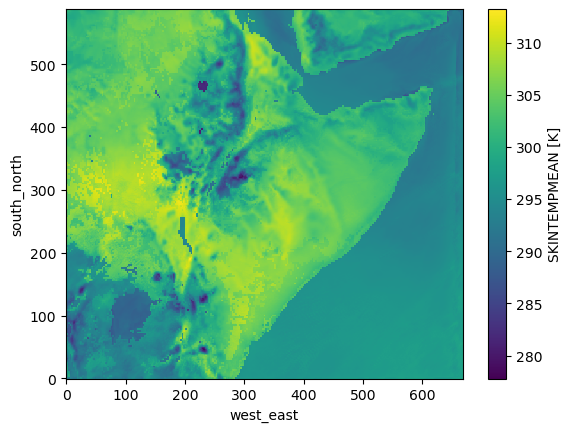

In [32]:
skin_temp_2.plot()

In [33]:
air_temp0 = skin_temp.isel(Time=0)
air_temp0

<xarray.DataArray 'SKINTEMPMEAN' (south_north: 588, west_east: 669)>
[393372 values with dtype=float32]
Coordinates:
    XLAT     (south_north, west_east) float32 ...
    XLONG    (south_north, west_east) float32 ...
Dimensions without coordinates: south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  MEAN SKIN TEMPERATURE IN DIAGNOSTIC OUTPUT INTERVAL
    units:        K
    stagger:      
    coordinates:  XLONG XLAT XTIME

In [34]:
lat_min = skin_temp.XLAT.min()
lat_max = skin_temp.XLAT.max()

lat_min, lat_max

(<xarray.DataArray 'XLAT' ()>
 array(-4.72153378),
 <xarray.DataArray 'XLAT' ()>
 array(16.25079918))

In [35]:
lon_min = skin_temp.XLONG.min()
lon_max = skin_temp.XLONG.max()

lon_min, lon_max

(<xarray.DataArray 'XLONG' ()>
 array(28.98875237),
 <xarray.DataArray 'XLONG' ()>
 array(53.11420441))

In [36]:
skin_temp_sub = skin_temp.sel(south_north=slice(3,15),west_east=slice(33,48))
skin_temp_sub

<xarray.DataArray 'SKINTEMPMEAN' (Time: 4, south_north: 12, west_east: 15)>
array([[[  0.     ,   0.     , ...,   0.     ,   0.     ],
        [  0.     ,   0.     , ...,   0.     ,   0.     ],
        ...,
        [  0.     ,   0.     , ...,   0.     ,   0.     ],
        [  0.     ,   0.     , ...,   0.     ,   0.     ]],

       [[293.9865 , 294.0948 , ..., 294.87387, 294.4212 ],
        [293.7756 , 293.92957, ..., 295.42456, 295.00272],
        ...,
        [295.24124, 295.62988, ..., 293.4073 , 293.27167],
        [295.46857, 295.60156, ..., 294.1968 , 293.90997]],

       [[296.41238, 296.6567 , ..., 300.5158 , 300.53952],
        [296.1609 , 296.4159 , ..., 300.5523 , 300.54922],
        ...,
        [297.88388, 298.09583, ..., 299.8665 , 299.90204],
        [298.0781 , 298.16965, ..., 299.94345, 299.95688]],

       [[296.9399 , 297.12784, ..., 300.45496, 300.23804],
        [296.74017, 296.63565, ..., 300.34827, 299.9458 ],
        ...,
        [298.72318, 298.85446, ..., 300.92807, 300.15344],
        [299.84238, 299.0455 , ..., 300.77228, 300.20245]]], dtype=float32)
Coordinates:
    XLAT     (Time, south_north, west_east) float32 -4.614 -4.614 ... -4.217
    XLONG    (Time, south_north, west_east) float32 30.18 30.22 ... 30.65 30.69
Dimensions without coordinates: Time, south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  MEAN SKIN TEMPERATURE IN DIAGNOSTIC OUTPUT INTERVAL
    units:        K
    stagger:      
    coordinates:  XLONG XLAT XTIME

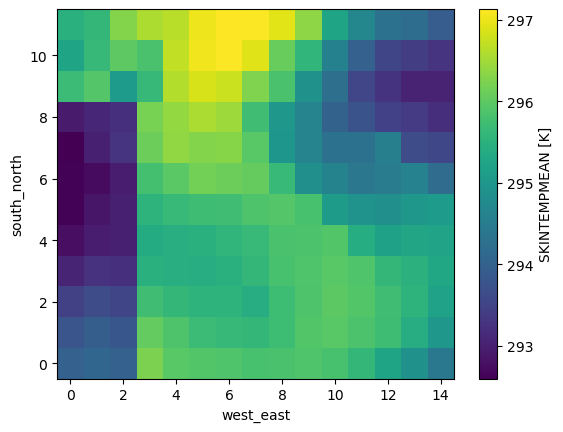

In [37]:
skin_temp_sub[1,:,:].plot()

In [38]:
skin_temp

<xarray.DataArray 'SKINTEMPMEAN' (Time: 4, south_north: 588, west_east: 669)>
[1573488 values with dtype=float32]
Coordinates:
    XLAT     (Time, south_north, west_east) float32 -4.722 -4.722 ... 16.25
    XLONG    (Time, south_north, west_east) float32 28.99 29.02 ... 53.08 53.11
Dimensions without coordinates: Time, south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  MEAN SKIN TEMPERATURE IN DIAGNOSTIC OUTPUT INTERVAL
    units:        K
    stagger:      
    coordinates:  XLONG XLAT XTIME

In [39]:
lon_val = skin_temp.XLONG[0,0,:]
lat_val = skin_temp.XLAT[0,:,0]

In [40]:
lon_val1 = lon_val.values
lat_val1 = lat_val.values

In [41]:
lon_val1.shape

(669,)

In [42]:
lon_val1

array([28.988752, 29.02487 , 29.060986, 29.0971  , 29.133217, 29.169334,
       29.205446, 29.241564, 29.27768 , 29.313793, 29.34991 , 29.386028,
       29.422142, 29.45826 , 29.494375, 29.53049 , 29.566608, 29.602726,
       29.63884 , 29.674957, 29.711075, 29.747187, 29.783304, 29.81942 ,
       29.855534, 29.891651, 29.927769, 29.96388 , 29.999998, 30.036114,
       30.072227, 30.108345, 30.144463, 30.180576, 30.216694, 30.25281 ,
       30.288925, 30.325043, 30.36116 , 30.397274, 30.433392, 30.46951 ,
       30.505621, 30.541739, 30.577854, 30.613968, 30.650085, 30.686203,
       30.722315, 30.758432, 30.79455 , 30.830666, 30.866783, 30.902897,
       30.939014, 30.975128, 31.011244, 31.047361, 31.083479, 31.119595,
       31.155708, 31.191826, 31.227943, 31.264055, 31.300173, 31.336288,
       31.372402, 31.40852 , 31.444637, 31.48075 , 31.516867, 31.552984,
       31.5891  , 31.625217, 31.661331, 31.697449, 31.733562, 31.769678,
       31.805796, 31.841913, 31.878029, 31.914143, 

In [43]:
lat_val1.shape

(588,)

In [44]:
skin_temp11 = skin_temp.assign_coords(south_north=(lat_val1), west_east=(lon_val1))

In [45]:
skin_temp11

<xarray.DataArray 'SKINTEMPMEAN' (Time: 4, south_north: 588, west_east: 669)>
[1573488 values with dtype=float32]
Coordinates:
    XLAT         (Time, south_north, west_east) float32 -4.722 -4.722 ... 16.25
    XLONG        (Time, south_north, west_east) float32 28.99 29.02 ... 53.11
  * south_north  (south_north) float32 -4.722 -4.686 -4.65 ... 16.18 16.22 16.25
  * west_east    (west_east) float32 28.99 29.02 29.06 ... 53.04 53.08 53.11
Dimensions without coordinates: Time
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  MEAN SKIN TEMPERATURE IN DIAGNOSTIC OUTPUT INTERVAL
    units:        K
    stagger:      
    coordinates:  XLONG XLAT XTIME

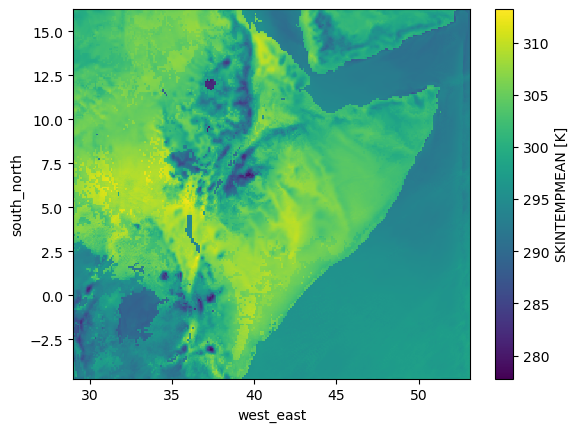

In [46]:
skin_temp11[1,:,:].plot()

In [47]:
skin_temp11_sub = skin_temp11.sel(south_north=slice(3,15),west_east=slice(33,48))
skin_temp11_sub

<xarray.DataArray 'SKINTEMPMEAN' (Time: 4, south_north: 338, west_east: 415)>
[561080 values with dtype=float32]
Coordinates:
    XLAT         (Time, south_north, west_east) float32 3.001 3.001 ... 15.0
    XLONG        (Time, south_north, west_east) float32 33.03 33.07 ... 47.99
  * south_north  (south_north) float32 3.001 3.037 3.073 ... 14.93 14.96 15.0
  * west_east    (west_east) float32 33.03 33.07 33.11 ... 47.91 47.95 47.99
Dimensions without coordinates: Time
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  MEAN SKIN TEMPERATURE IN DIAGNOSTIC OUTPUT INTERVAL
    units:        K
    stagger:      
    coordinates:  XLONG XLAT XTIME

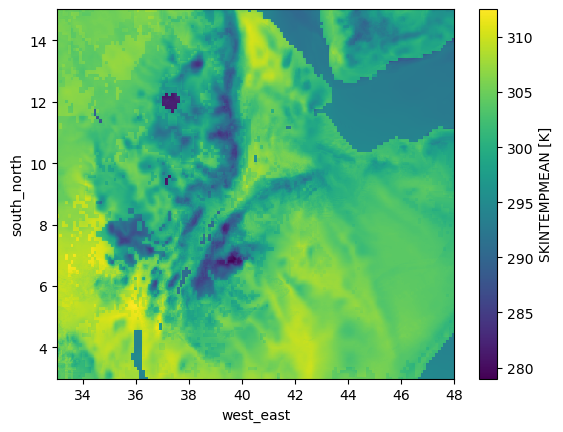

In [48]:
skin_temp11_sub[1,:,:].plot()